In [1]:
!jt -r

Reset css and font defaults in:
/home/guangyichen/.jupyter/custom &
/home/guangyichen/.local/share/jupyter/nbextensions


In [58]:
# STEP 1: Generating the U-shaped plot:
# X-axis: unique clade number per protein cluster
# Y-axis: Counts

# read file
import pandas as pd
import re

mmseqs_res_path = "/home/guangyichen/Desktop/WIBI/phd/Tasks/Phylogeny/Phylogeny-redo-2/SI0.7/mmseqs_res/cluster_result_0.7_cluster.tsv"
tsv_read = pd.read_csv(mmseqs_res_path, header = None, delim_whitespace=True)
representative_proteins = tsv_read[0]
all_proteins = tsv_read[1]

In [59]:
# Loop through file to store each cluster as list of list
clades_counter_list = []
all_clades_list = []
counter = 1
for i in range(0,all_proteins.size-1):
    if (representative_proteins[i] != "-"):
        each_cluster = []
        each_cluster.append(representative_proteins[i])
        for j in range(i+1,representative_proteins.size-1):
            if (representative_proteins[j] == representative_proteins[i]):
                each_cluster.append(all_proteins[j])
                representative_proteins[j] = "-"
            else:
                break

        clades_list = []
        for k in range(0, len(each_cluster)):
            each_protein = each_cluster[k]
            
            # Parse protein name to get clade name
            if (each_protein[0:4] == "HIPS"):
                each_clade = re.sub("_BOGUS_[0-9]{2,}", "", each_protein)
                each_clade = re.sub("_ctg.{2,}$", "", each_clade)
            elif (each_protein[0:2] == "SB"):
                each_clade = re.sub("_[0-9]{2,}", "", each_protein)
            elif (each_protein[0:4] == "NOSO"):
                each_clade = re.sub("_[0-9]{2,}", "", each_protein)
            else:
                each_clade = re.sub(".gb.{2,}", "", each_protein)
                each_clade = re.sub("_[a-z | A-Z].*.", "", each_clade) 
            
            clades_list.append(each_clade)
            all_clades_list.append(each_clade)
            print("{0:.0%}".format(counter/len(all_proteins)), end = "\r")
            counter += 1
            
        clades_set = set(clades_list)
        clades_counter_list.append(len(clades_set))

all_clades_set = set(all_clades_list)

In [60]:
#Checker
print(len(all_clades_set)) #equal to the total number of input strains
print(len(clades_counter_list)) #equal to the total number of clusters
print(len(all_proteins)) #equal to the total number of input proteins

79
203419
683076


Text(0, 0.5, 'Count')

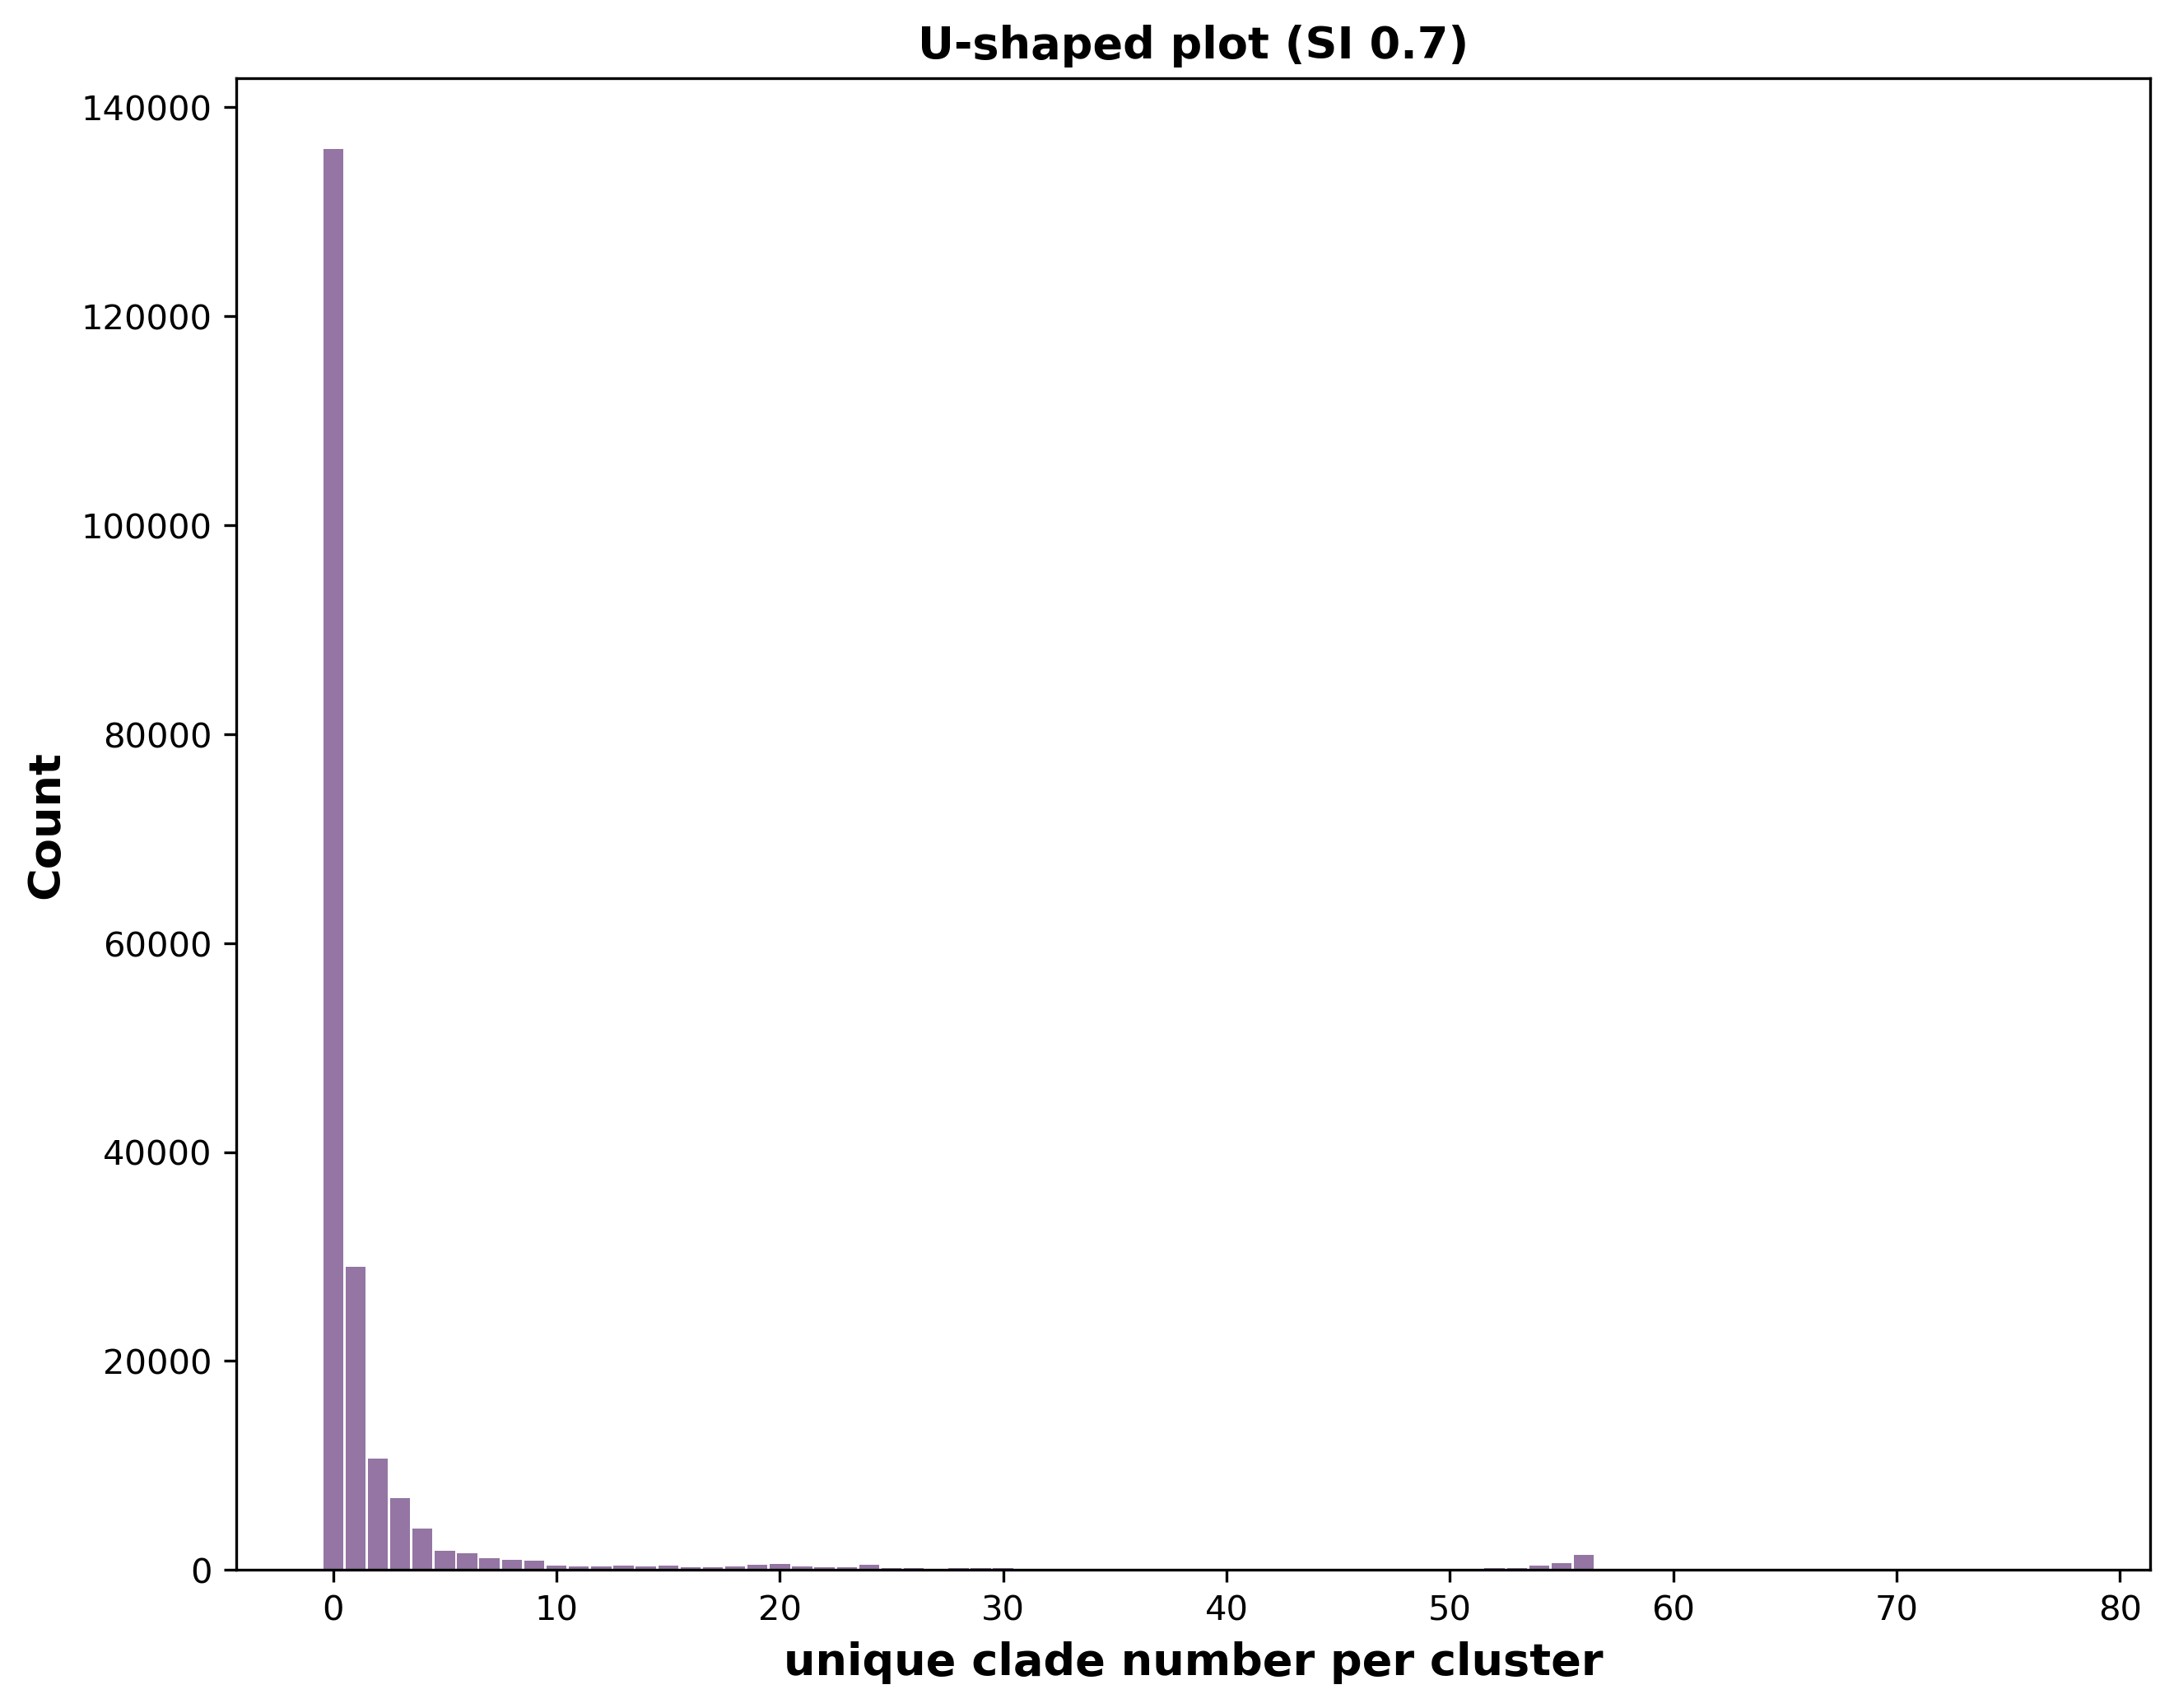

In [61]:
# plot the U-shaped Figure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=300)

max_cluster_size = max(clades_counter_list)

u_shape_bar_list = []
for i in range(1,max_cluster_size):
    counter = 1;
    for j in clades_counter_list:
        if (i == j):
            counter += 1
    u_shape_bar_list.append(counter)
    
br = np.arange(len(u_shape_bar_list))
plt.bar(br, u_shape_bar_list, width = 0.9, color = (0.3,0.1,0.4,0.6)) 
plt.title("U-shaped plot (SI 0.7)", fontweight ='bold', fontsize = 13) 
plt.xlabel("unique clade number per cluster", fontweight ='bold', fontsize = 13) 
plt.ylabel("Count", fontweight ='bold', fontsize = 13)

In [62]:
# STEP 2: Select representative protein clusters
import re
import os
from Bio import SeqIO
import pandas as pd

# read file
tsv_read = pd.read_csv(mmseqs_res_path, header = None, delim_whitespace=True)
representative_proteins = tsv_read[0]
all_proteins = tsv_read[1]

threshold = 20 
protein_list = [] 
counter = 1
for i in range(0,all_proteins.size-1):
    if (representative_proteins[i] != "-"):
        each_cluster = []
        each_cluster.append(representative_proteins[i])
        for j in range(i+1,representative_proteins.size-1):
            if (representative_proteins[j] == representative_proteins[i]):
                each_cluster.append(all_proteins[j])
                representative_proteins[j] = "-"
            else:
                break

        clades_list = []
        for k in range(0, len(each_cluster)-1):
            each_protein = each_cluster[k]
            
            # Parse protein name to get clade name                
            if (each_protein[0:4] == "HIPS"):
                each_clade = re.sub("_BOGUS_[0-9]{2,}", "", each_protein)
                each_clade = re.sub("_ctg.{2,}$", "", each_clade)
            elif (each_protein[0:2] == "SB"):
                each_clade = re.sub("_[0-9]{2,}", "", each_protein)
            elif (each_protein[0:4] == "NOSO"):
                each_clade = re.sub("_[0-9]{2,}", "", each_protein)
            else:
                each_clade = re.sub(".gb.{2,}", "", each_protein)
                each_clade = re.sub("_[a-z | A-Z].*.", "", each_clade) 
            
            clades_list.append(each_clade)
            print("{0:.0%}".format(counter/len(all_proteins)), end = "\r")
            counter += 1

        clades_set = set(clades_list) 
        if (len(clades_set) >= threshold):
            for each_protein in each_cluster:
                protein_list.append(each_protein)

print(len(protein_list))

302300


In [63]:
# Get Unique Clade 
# For testing purpose 
all_clade_names = []
for each_protein in protein_list: 
       
    # Parse protein name to get clade name                
    if (each_protein[0:4] == "HIPS"):
        each_clade = re.sub("_BOGUS_[0-9]{2,}", "", each_protein)
        each_clade = re.sub("_ctg.{2,}$", "", each_clade)
    elif (each_protein[0:2] == "SB"):
        each_clade = re.sub("_[0-9]{2,}", "", each_protein)
    elif (each_protein[0:4] == "NOSO"):
        each_clade = re.sub("_[0-9]{2,}", "", each_protein)
    else:
        each_clade = re.sub(".gb.{2,}", "", each_protein)
        each_clade = re.sub("_[a-z | A-Z].*.", "", each_clade)        
        
    all_clade_names.append(each_clade)
    
unique_clade_name = set(all_clade_names)
print(len(unique_clade_name))

79


In [64]:
# Output Selected Proteins as Fasta file 
output_dir = "/home/guangyichen/Desktop"
input_protein_folder = "/home/guangyichen/Desktop/WIBI/phd/Tasks/Phylogeny/Phylogeny-redo-2/all-proteins" 

counter = 1
selected_prot = ""

for each_protein in protein_list:
    
    # Parse protein name to get clade name                
    if (each_protein[0:4] == "HIPS"):
        each_clade = re.sub("_BOGUS_[0-9]{2,}", "", each_protein)
        each_clade = re.sub("_ctg.{2,}$", "", each_clade)
        each_clade = each_clade + ".fasta"
    elif (each_protein[0:2] == "SB"):
        each_clade = re.sub("_[0-9]{2,}", "", each_protein)
        each_clade = each_clade + ".faa"
    elif (each_protein[0:4] == "NOSO"):
        each_clade = re.sub("_[0-9]{2,}", "", each_protein)
        each_clade = each_clade + ".faa"
    else:
        each_clade = re.sub(".gb.{2,}", "", each_protein)
        each_clade = re.sub("_WP.{2,}$", "", each_clade)
        each_clade = re.sub("_annotated_assembly.{0,}$", "", each_clade)
        each_clade = each_clade + ".fasta"
    
    input_protein_fasta = os.path.join(input_protein_folder, each_clade) 
    for seq_record in SeqIO.parse(input_protein_fasta, "fasta"):
        if (seq_record.id == each_protein):
            record_protein = ">" + seq_record.id + "\n" + seq_record.seq + "\n"
            selected_prot += record_protein
            print("{0:.0%}".format(counter/len(protein_list)), end = "\r")
            counter += 1
            break 
        else:
            pass 
    

out_f_name = "Selected_Prot.fasta"
print("Outputting the selected proteins ...")
with open(os.path.join(output_dir, out_f_name), "w") as file:
    file.write(str(selected_prot))
print("Finished.")

Outputting the selected proteins ...
Finished.


In [65]:
# STEP 3: Separate proteins
import re
import os
from Bio import SeqIO

#clade_name = ""
#clade_records = ""

all_clade_names = []
input_protein_fasta = "/home/guangyichen/Desktop/WIBI/phd/Tasks/Phylogeny/Phylogeny-redo-2/SI0.7/Selected_Prot.fasta"
output_dir = "/home/guangyichen/Desktop/WIBI/phd/Tasks/Phylogeny/Phylogeny-redo-2/SI0.7/toSeparate"

for seq_record in SeqIO.parse(input_protein_fasta, "fasta"):
    
    # Parse protein name to get clade name                
    if (seq_record.id[0:4] == "HIPS"):
        each_clade = re.sub("_BOGUS_[0-9]{2,}", "", seq_record.id)
        each_clade = re.sub("_ctg.{2,}$", "", each_clade)
    elif (seq_record.id[0:2] == "SB"):
        each_clade = re.sub("_[0-9]{2,}", "", seq_record.id)
    elif (seq_record.id[0:4] == "NOSO"):
        each_clade = re.sub("_[0-9]{2,}", "", seq_record.id)
    else:
        each_clade = re.sub(".gb.{2,}", "", seq_record.id)
        each_clade = re.sub("_[a-z | A-Z].*.", "", each_clade) 

    
    all_clade_names.append(each_clade)

unique_clade_name = set(all_clade_names)
print(len(unique_clade_name))
#print(unique_clade_name)

counter = 1
for clade_name in unique_clade_name:
    
    output_proteins = ""
    
    for seq_record in SeqIO.parse(input_protein_fasta, "fasta"):
        
        # Parse protein name to get clade name                
        if (seq_record.id[0:4] == "HIPS"):
            each_clade = re.sub("_BOGUS_[0-9]{2,}", "", seq_record.id)
            each_clade = re.sub("_ctg.{2,}$", "", each_clade)
        elif (seq_record.id[0:2] == "SB"):
            each_clade = re.sub("_[0-9]{2,}", "", seq_record.id)
        elif (seq_record.id[0:4] == "NOSO"):
            each_clade = re.sub("_[0-9]{2,}", "", seq_record.id)
        else:
            each_clade = re.sub(".gb.{2,}", "", seq_record.id)
            each_clade = re.sub("_[a-z | A-Z].*.", "", each_clade) 

        record_protein = ">" + seq_record.id + "\n" + seq_record.seq + "\n"
        
        if each_clade  == clade_name:
            output_proteins += record_protein
            
    out_f_name = clade_name + ".fasta"
    
    with open(os.path.join(output_dir, out_f_name), "w") as file:
        file.write(str(output_proteins))
    print("{0:.0%}".format(counter/len(unique_clade_name)), end = "\r")
    counter += 1

79
